In [1]:
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
seed = 128
rng = np.random.RandomState(seed)

In [3]:
train = pd.read_csv('train.csv')
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [4]:
test=pd.read_csv('Test_fCbTej3_0j1gHmj.csv')
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [5]:
import matplotlib.pyplot as plt
img_name=rng.choice(train.filename)
filepath = os.path.join('Images', 'train', img_name)
img=imread(filepath,flatten=True)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
img.shape

(28, 28)

### DataSet Creation

In [7]:
temp=[]
for img_name in train.filename:
    image_path=os.path.join('Images', 'train', img_name)
    img=imread(image_path, flatten=True)
    img=img.astype('float32')
    temp.append(img)
    
train_x=np.stack(temp)
    
    
temp = []
for img_name in test.filename:
    image_path = os.path.join('Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

In [8]:
train_x.shape

(49000, 28, 28)

In [9]:
test_x.shape

(21000, 28, 28)

In [10]:
y=train.label

### Deep Learning

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_x,y,random_state=42,test_size=0.33)

In [12]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)

# Making sure that the values are float so that we can get decimal points after division
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255

print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

x_train shape: (32830, 28, 28, 1)
Number of images in x_train 32830
Number of images in x_test 16170


In [82]:
# Importing the required Keras modules containing model and layers
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

# Creating a Sequential Model and adding the layers
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=30)
image_index = 2500

Train on 32830 samples
Epoch 1/30
32830/32830 [==============================] - 4s 115us/sample - loss: 0.3712 - acc: 0.8930
Epoch 2/30
32830/32830 [==============================] - 4s 107us/sample - loss: 0.1810 - acc: 0.9474
Epoch 3/30
32830/32830 [==============================] - 4s 114us/sample - loss: 0.1366 - acc: 0.9586
Epoch 4/30
32830/32830 [==============================] - 4s 111us/sample - loss: 0.1058 - acc: 0.9684
Epoch 5/30
32830/32830 [==============================] - 4s 115us/sample - loss: 0.0908 - acc: 0.9718
Epoch 6/30
32830/32830 [==============================] - 4s 111us/sample - loss: 0.0742 - acc: 0.9769
Epoch 7/30
32830/32830 [==============================] - 5s 155us/sample - loss: 0.0654 - acc: 0.9796
Epoch 8/30
32830/32830 [==============================] - 5s 151us/sample - loss: 0.0598 - acc: 0.9815
Epoch 9/30
32830/32830 [==============================] - 4s 137us/sample - loss: 0.0515 - acc: 0.9831
Epoch 10/30
32830/32830 [=========================

In [83]:
z=model.evaluate(X_test,y_test)

16170/16170 [==============================] - 1s 80us/sample - loss: 0.1222 - acc: 0.9743


In [84]:
z

[0.12222090917351636, 0.9742733]

### Test

In [85]:
def preTest(x_train):
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    x_train = x_train.astype('float32')
    x_train /= 255
    print('x_train shape:', x_train.shape)
    print('Number of images in x_train', x_train.shape[0])
    return x_train

In [86]:
xt = preTest(test_x)

x_train shape: (21000, 28, 28, 1)
Number of images in x_train 21000


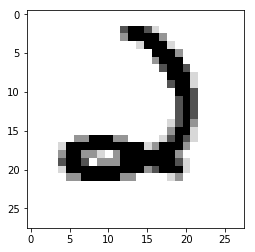

In [87]:
p = []
for i in range (0,21000):
    plt.imshow(xt[i].reshape(28, 28),cmap='Greys')
    predio = model.predict(xt[i].reshape(1, 28,28, 1))
    p.append(predio.argmax())

In [88]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [89]:
sample_submission=pd.read_csv('sample_submission_npBPSZB.csv')
sample_submission.head()

,filename,label
0,49000.png,0
1,49001.png,0
2,49002.png,0
3,49003.png,0
4,49004.png,0


In [90]:
sample_submission['filename'] = test['filename']
sample_submission['label']=p

In [91]:
sample_submission.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [92]:
sample_submission.to_csv('soln.csv',index=False)